In [327]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [328]:
os.getcwd()

'C:\\Users\\Adhya\\Desktop\\Daily ninja'

In [329]:
data=pd.read_csv("houseelf_earlength_dna_data.csv",sep=",")

In [330]:
data.shape

(10, 3)

In [331]:
data.dtypes

id            object
earlength    float64
dnaseq        object
dtype: object

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
id           10 non-null object
earlength    10 non-null float64
dnaseq       10 non-null object
dtypes: float64(1), object(2)
memory usage: 320.0+ bytes


In [333]:
data=data.rename(columns={"id":"ID"})

In [334]:
def gc(dt):
    dt.upper()
    gc = (dt.count('G') + dt.count('C'))/ len(dt)*100
    return gc

In [335]:
def size(x):
    if x>10:
        return 'large'
    return 'small'

In [336]:
#data['earlength']=np.where(data['earlength']>10,'large','small')


In [337]:
data['earlength']=data['earlength'].apply(size)
data['dnaseq']=data['dnaseq'].apply(gc)

In [338]:
data

,ID,earlength,dnaseq
0,17A,small,41.0
1,24P,small,39.0
2,09Q,large,57.0
3,65Y,small,40.0
4,19N,small,36.0
5,92K,large,62.0
6,33W,small,52.0
7,98C,large,63.0
8,75G,small,47.0
9,88Q,large,52.0


In [339]:
pd.pivot_table(data, values=['dnaseq'], index=['earlength'], aggfunc=np.mean)

,dnaseq
earlength,
large,58.5
small,42.5


In [340]:
data.to_csv("grangers_analysis.csv.",index=False)

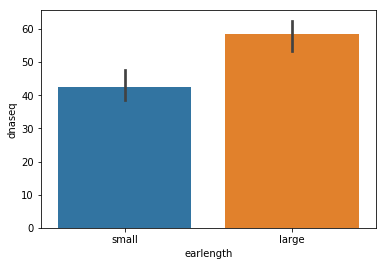

In [342]:
fig, ax = plt.subplots()
sns.barplot(data=data[['earlength','dnaseq']],
            x='earlength',
            y='dnaseq',
            ax=ax)
plt.show()
